<a href="https://colab.research.google.com/github/Jasongiks/Hotel_Revenue_Growth_Strategy_Analysis/blob/main/Hotel_Revenue_Growth_Strategy_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries, Loading Data and Data Exploration

In [ ]:
#Importing the libraries we will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [ ]:
#Loading our data set
hotel_df = pd.read_csv('hotel_bookings.csv')
#displaying the first five rows of our data set
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
#showing the number of rows and columns in our data set
hotel_df.shape

(119390, 32)

In [ ]:
#From above, there are 119390 rows and 32 columns in our data set.
#checking for the datatypes of our columns
hotel_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# Checking for duplicates missing values and cleaning our dataset

In [ ]:
#checking if there are any duplicates in our data set
hotel_df.duplicated().values.any()

True

In [ ]:
#From above, we can see that our data set contains some duplicated values.
#Removing any duplicated data
hotel_df = hotel_df.drop_duplicates()

In [ ]:
#Checking the shape of our data after removal of duplicates
hotel_df.shape

(87396, 32)

In [ ]:
#checking for the number of missing values in each column
hotel_df.isnull().sum()

hotel                                 0
is_canceled                           0
lead_time                             0
arrival_date_year                     0
arrival_date_month                    0
arrival_date_week_number              0
arrival_date_day_of_month             0
stays_in_weekend_nights               0
stays_in_week_nights                  0
adults                                0
children                              4
babies                                0
meal                                  0
country                             452
market_segment                        0
distribution_channel                  0
is_repeated_guest                     0
previous_cancellations                0
previous_bookings_not_canceled        0
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
agent                             12193
company                           82137


In [ ]:
#there are 4 missing values in the children column.
#we can replace this with the mean of our column without affecting the 
#integrity of our data set
hotel_df.fillna(hotel_df['children'].mean(), inplace = True)



In [ ]:
#there are 452 missing values in the country column.
#we can replace this with the value in the previos row without
#affecting the integrity of our dataset
hotel_df['country'].fillna(method = 'pad',inplace = True)

In [ ]:
#Due to the large number of missiong values in the company column in relation
#to the total dataset, we are going to drop this column

hotel_df.drop(columns = ["company"], axis = 1, inplace = True)
hotel_df.head(1)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0.13864,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [ ]:
# Replacing the missing values in the agent column with the the string unknown
hotel_df.fillna(value = 'Unknown',inplace = True)

In [ ]:
#checking if there are any missing values not taken care of
hotel_df.isnull().values.any()

False

In [ ]:
#we can see that there are no missing values left in our dataset
#renaming our data frame
hotel_clean = hotel_df

# Answering Research Questions Raised

1. How many bookings were cancelled?

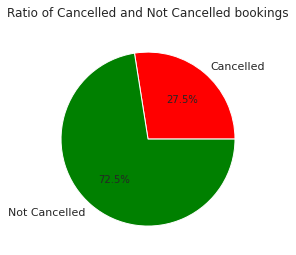

In [ ]:
#getting the number of cancelled bookings
cancelled = hotel_clean[(hotel_clean['is_canceled'] == 1)].count()['hotel']
#getting the number of bookings that were not cancelled
not_cancelled = hotel_clean[(hotel_clean['is_canceled'] == 0)].count()['hotel']
#creating a list of bookings cancelled and not cancelled
value = [cancelled, not_cancelled]
labels = ['Cancelled','Not Cancelled']
#creating a pie chart to visualise our data
plt.pie(x = value, labels = labels, autopct = '%1.1f%%', explode = [0,0], colors = ['red','green'])
plt.title('Ratio of Cancelled and Not Cancelled bookings', pad = 14)
plt.show()

**Observation:** majority of the bookings made were not cancelled.

2. What was the booking ratio between resort hotel and city hotel?

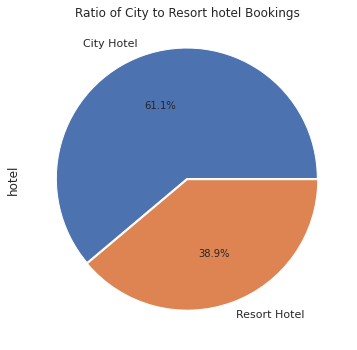

In [ ]:
#creating a pie chart to visualise the ratio
hotel_clean.hotel.value_counts().plot(kind = 'pie', autopct = '%1.1f%%',figsize = [8,6], explode = [0.01,0])
plt.title("Ratio of City to Resort hotel Bookings", pad =0)
plt.show()

**Observation:** 61.1% of the bookings made were for the city hotel.

3. What was the percentage of booking for each year?


2016    42391
2017    31692
2015    13313
Name: arrival_date_year, dtype: int64


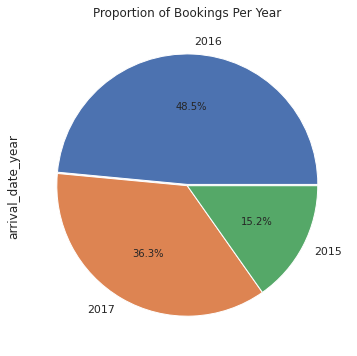

In [ ]:
print(hotel_clean.arrival_date_year.value_counts())
hotel_clean.arrival_date_year.value_counts().plot(kind = 'pie', autopct ='%1.1f%%', figsize = [8,6], explode = (0.01,0,0))
plt.title("Proportion of Bookings Per Year")
plt.show()

**Observation:** 2016 had the most bookings while 2015 had the least number of bookings.

4. Which was the most busy month for hotel?

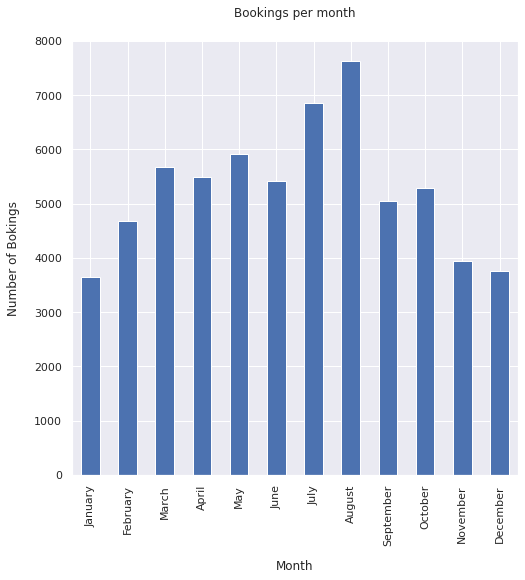

In [ ]:
#creating an order of how we want our months to appear
order = ['January','February','March','April','May','June','July','August','September','October','November','December']
#getting the number of bookings not cancelled
not_cancelled = hotel_clean[(hotel_clean['is_canceled'] == 0)]

#plotting a bar graph to visualise the data
not_cancelled.arrival_date_month.value_counts().reindex(order).plot(kind = 'bar', figsize = [8,8])
plt.xlabel("Month", labelpad = 14)
plt.ylabel("Number of Bokings", labelpad = 14)
plt.title("Bookings per month", y = 1.04)
plt.show()

**Observation:**August was the busiest month with December and January having the lowest number of guests.

5. Most guests came from which country?

In [ ]:
#grouping the bookings not cancelled by country of guest origin
visits = not_cancelled.groupby('country').count()[['hotel']].reset_index()
#diplaying our list in descending order and showing the first five records
visits.sort_values(by = 'hotel', ascending = 0).head()


,country,hotel
126,PRT,17662
58,GBR,8448
55,FRA,7104
51,ESP,5390
43,DEU,4334


**Observation:** Majority of the guests came from Portugal, then Britain, France, Spain and the Netherlands.

6. How long do most people stay in hotels?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


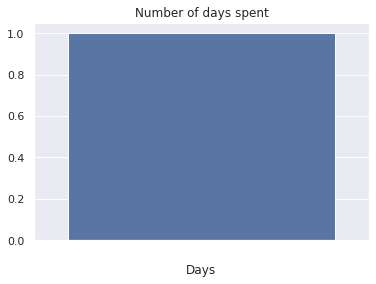

In [ ]:
#Creating a column that shows the number total number of days spent by a guest
not_cancelled['total_days'] = not_cancelled['stays_in_week_nights'] + not_cancelled['stays_in_weekend_nights']
#getting the total number of days that guests spent at the hotel
sns.barplot(y= not_cancelled['total_days'].mode() )
plt.xlabel('Days', labelpad = 14)
plt.title('Number of days spent')
plt.show()

**Observation:**Most guests spent a total of one day at the hotel

7. Which was the most booked accommodation type (Single, Couple, Family)?

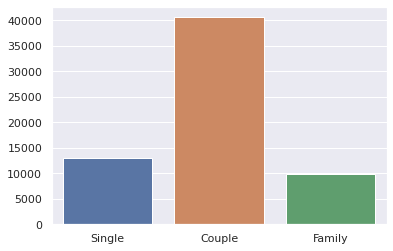

In [ ]:
#getting the number of singles

singles = not_cancelled[(not_cancelled.adults == 1) & (not_cancelled.babies == 0) & (not_cancelled.children == 0)].count()['hotel']

#getting the total number of couples that visited the hotels
couples = not_cancelled[(not_cancelled.adults == 2) & (not_cancelled.babies == 0) & (not_cancelled.children == 0)].count()['hotel']
#getting the number of families that visited the hotels
Family = not_cancelled.count()['hotel'] - singles - couples
#creating a bar plot to visualise the numbers obtained
label = ['Single', 'Couple', 'Family']
value = [singles, couples, Family]
sns.barplot(x= label, y=value, )

**Observation:** Majority of the gusts at the hotels were couples.

# Recommendations

From our analysis, we provide the following recommendations
1. Since majority of the bookings are for the city hotel, the management should consider providing cheaper rates or special offers for guests at the city hotel inorder to raise the revenue for the company.
2. Most guests at the hotel were received during the months of July and August. This means most people tend to travel more during this period. The management should consider raising the booking rates during this two months to capitalise on the increased demand in hotel rooms during this period.
3. The least busy months are December and January. The management should consider running promotional offers and discounted hotel rates during this period to improve hotel occupancy.
4. Due to the high number of guests travelling from portugal, Great Britain and France, the management should consider running a promotional rates for guests travelling from these countries.
5. Since most guest travel as couples, the management should consider increasing the number of hotel rooms with two bed occupancy to take advantage of the large couple guest market.

# Challenging your solution

1. On which days of the month do most guests check in at the hotels?


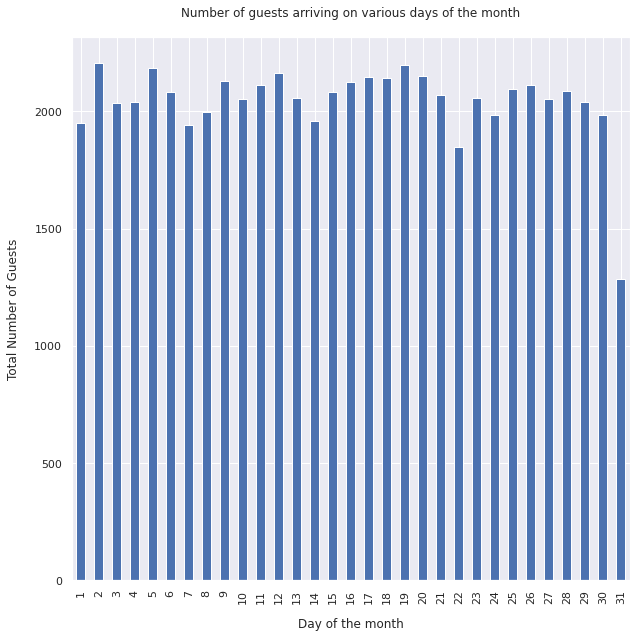

In [ ]:
#creating a list of how we want our data ordered.
new_order = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]
#plotting a bargraph to visualise our data
not_cancelled.arrival_date_day_of_month.value_counts().reindex(new_order).plot(kind = 'bar', figsize = [10,10])
plt.title("Number of guests arriving on various days of the month", pad = 20)
plt.xlabel("Day of the month", labelpad = 14)
plt.ylabel("Total Number of Guests", labelpad = 14)
plt.show()


**Observation:**The number of arrivals is consistent in all days.

2. Which meal is taken by most guests at the hotel

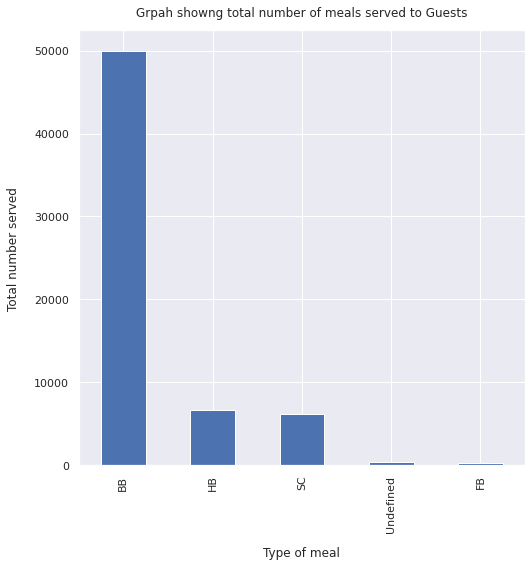

In [ ]:
#plotting a bar graph to visualise this
not_cancelled.meal.value_counts().plot(kind='bar',figsize = [8,8])
plt.xlabel('Type of meal',labelpad = 14)
plt.ylabel('Total number served', labelpad = 14)
plt.title("Grpah showng total number of meals served to Guests", pad = 14)
plt.show()

**Observation:**The most consumed meal by guests is the bed and breakfast meal.

3. Are most of the guests at the hotel first time or repeat guests?


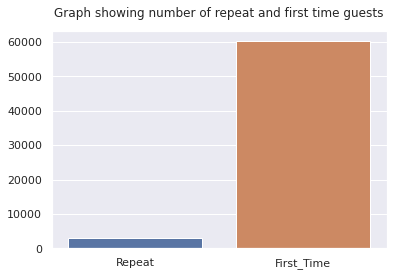

In [ ]:
#getting the number of repeat and first time guest.
repeat = not_cancelled[(not_cancelled.is_repeated_guest == 1)].count()['hotel']
not_repeat = not_cancelled[(not_cancelled.is_repeated_guest == 0)].count()['hotel']
value = [repeat, not_repeat]
label = ['Repeat', 'First_Time']
#plotting a bargraph to visualise the information
sns.barplot(x=label, y = value)
plt.title("Graph showing number of repeat and first time guests", pad = 14)
plt.show()


**Observation:**Most of the guests at the hotels are first time guests

**Our Observation**
1. Most guests are first time guests with few being repeat guests. Management should improve the customer experience at the hotel to encourage the return of guests thus increasing hotel revenue.
2. Most guests take the BB meal package. There should be a special offer for the other meals to encourage their consumption.


# Follow Up Questions

1. **Did we have the right data?** yes.The right data was available.

2. **Did we need other data to answer our question?**No. The data we had was sufficient to answer the research questions.

3. **Did we have the right questions?** Yes. the right questions were asked in providing a solution to our research dilemma.
                              